In [3]:
import pandas as pd 
from pandas import Series, DataFrame, Panel
import numpy as np

In [4]:
df = pd.read_csv('/Users/mueric35/Box Sync/nytimes_articles/article_time.csv')
df = df.iloc[:,1:3]
df['article'] = df.article.apply(str)
df['time'] = pd.to_datetime(df['time'])

In [5]:
df_article_sum = df.groupby('article').aggregate('count').reset_index()
df_article_sum.sort_values('time',ascending=False).head()

,article,time
9,17,6707
4,12,6234
0,0,4519
67,7,3451
34,4,3267


In [6]:
df_time_sum = df.groupby('time').aggregate('count').reset_index()
df_time_sum.columns = ['time','Count']
df_time_sum.head()

,time,Count
0,2016-01-07,259
1,2016-01-08,108
2,2016-01-09,166
3,2016-01-10,120
4,2016-01-11,183


In [7]:
topic = ['17','12','0','7','4']

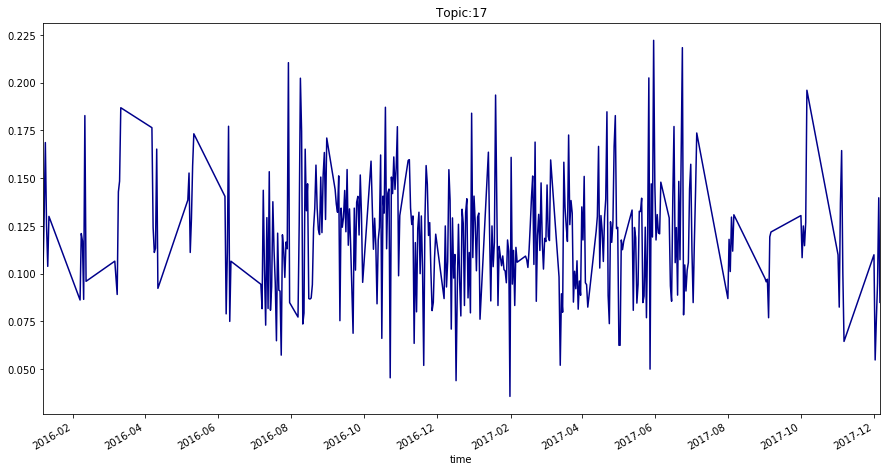

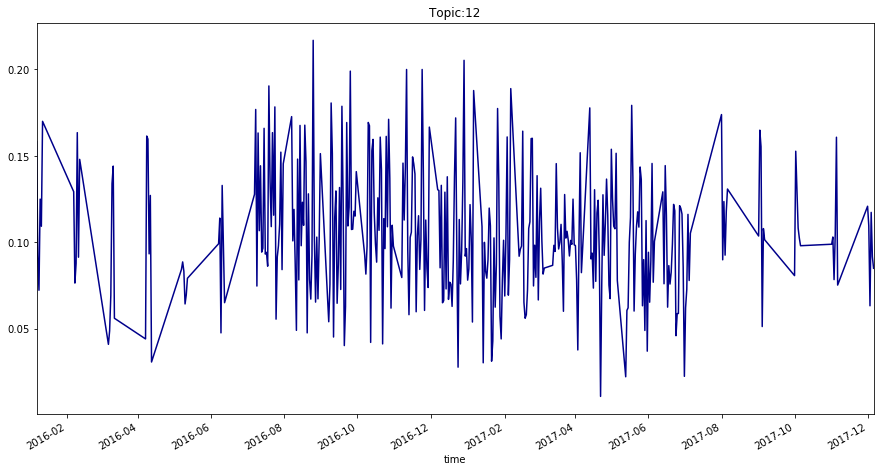

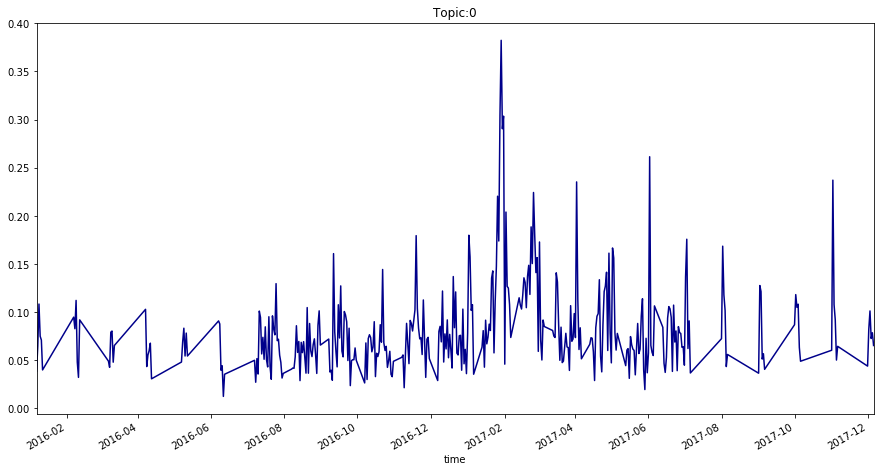

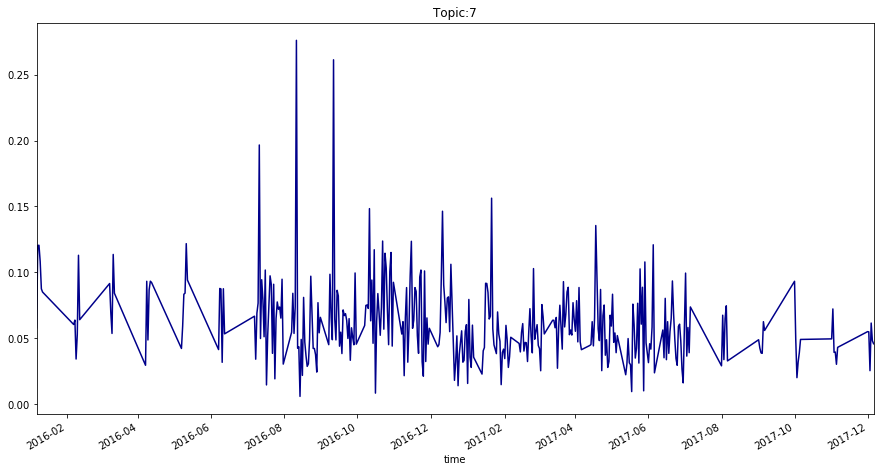

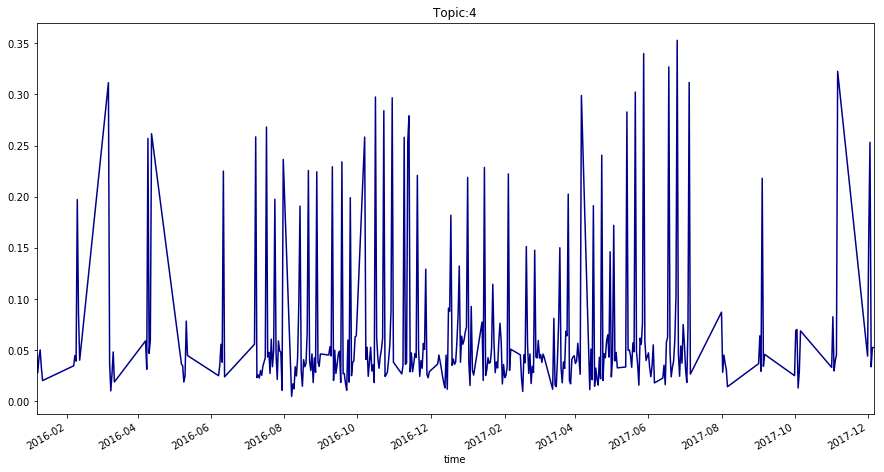

In [10]:
import matplotlib.pyplot as plt

j = 0
for i in topic:
    select_article = df[df.article == i]
    select_count = select_article.groupby(['time']).agg('count').reset_index()
    select_count = select_count.merge(df_time_sum)
    select_count['trans_count'] = select_count.article/select_count.Count
    select_series = select_count[['time','trans_count']]
    select_array = np.array(select_series.trans_count)
    pp = Series(select_array, index= select_series.time)
    plt.figure(figsize = (15,8))
    pp.plot(color = 'darkblue')
    plt.title('Topic:' + i)
    plt.show()
    j+=1